## **Creación de modelos**

### 0. Importando librerías


In [2]:
import numpy as np
import pandas as pd

from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE



### 1. Cargando los datos

- El código es tomado de este notebook: [COVID-19 Literature Clustering](https://www.kaggle.com/code/maksimeren/covid-19-literature-clustering)
- Son los datos limpiados en el notebook 03 y guardados en el repositorio en GitHub:

In [3]:
url = "https://raw.githubusercontent.com/ArleyF/proyecto_enfermedades_cardiacas/master/dataset/heart_2020_cleaned.csv"
df = pd.read_csv(url)

In [4]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,7.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,1,1,4,8.0,1,0,0


### 2. PCA y Clustering

#### PCA

In [5]:
X = df

In [6]:
pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X)
X_reduced.shape

(319795, 4)

#### Definiendo la cantidad de clústeres

In [7]:
# run kmeans with many different k
distortions = []
K = range(2, 30)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42).fit(X_reduced)
    k_means.fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('Found distortion for {} clusters'.format(k))

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters


#### Visualizando el Método del Codo

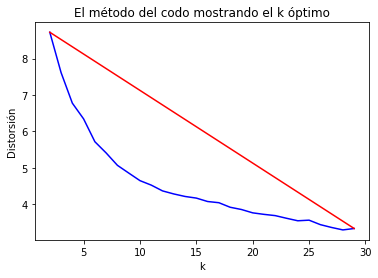

In [11]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distorsión')
plt.title('El método del codo mostrando el k óptimo')
plt.show()

#### k-means

In [27]:
k = 9
kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [12]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,5,0,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,5,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,5,0,0,2,7.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,5,1,1,4,8.0,1,0,0


#### Reduciendo dimensionalidad con t-SNE

In [13]:
tsne = TSNE(verbose=1, perplexity=50)  # Changed perplexity from 100 to 50 per FAQ
X_embedded = tsne.fit_transform(X)

c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 319795 samples in 0.030s...
[t-SNE] Computed neighbors for 319795 samples in 110.399s...
[t-SNE] Computed conditional probabilities for sample 1000 / 319795
[t-SNE] Computed conditional probabilities for sample 2000 / 319795
[t-SNE] Computed conditional probabilities for sample 3000 / 319795
[t-SNE] Computed conditional probabilities for sample 4000 / 319795
[t-SNE] Computed conditional probabilities for sample 5000 / 319795
[t-SNE] Computed conditional probabilities for sample 6000 / 319795
[t-SNE] Computed conditional probabilities for sample 7000 / 319795
[t-SNE] Computed conditional probabilities for sample 8000 / 319795
[t-SNE] Computed conditional probabilities for sample 9000 / 319795
[t-SNE] Computed conditional probabilities for sample 10000 / 319795
[t-SNE] Computed conditional probabilities for sample 11000 / 319795
[t-SNE] Computed conditional probabilities for sample 12000 / 319795
[t-SNE] Computed conditional prob

#### Viendo los datos en 2 dimensiones

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


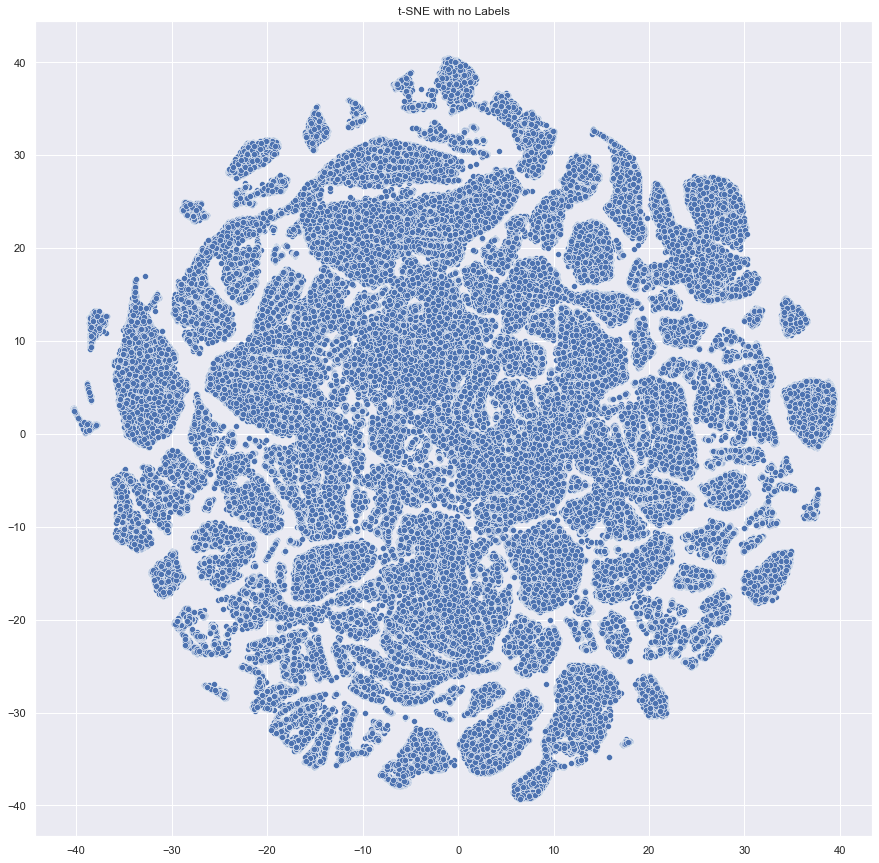

In [28]:
# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
plt.title('t-SNE with no Labels')
#plt.savefig("heart_disease.png")
plt.show()

#### Usando las agrupaciones encontradas por k-means como etiquetas de colores

c:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


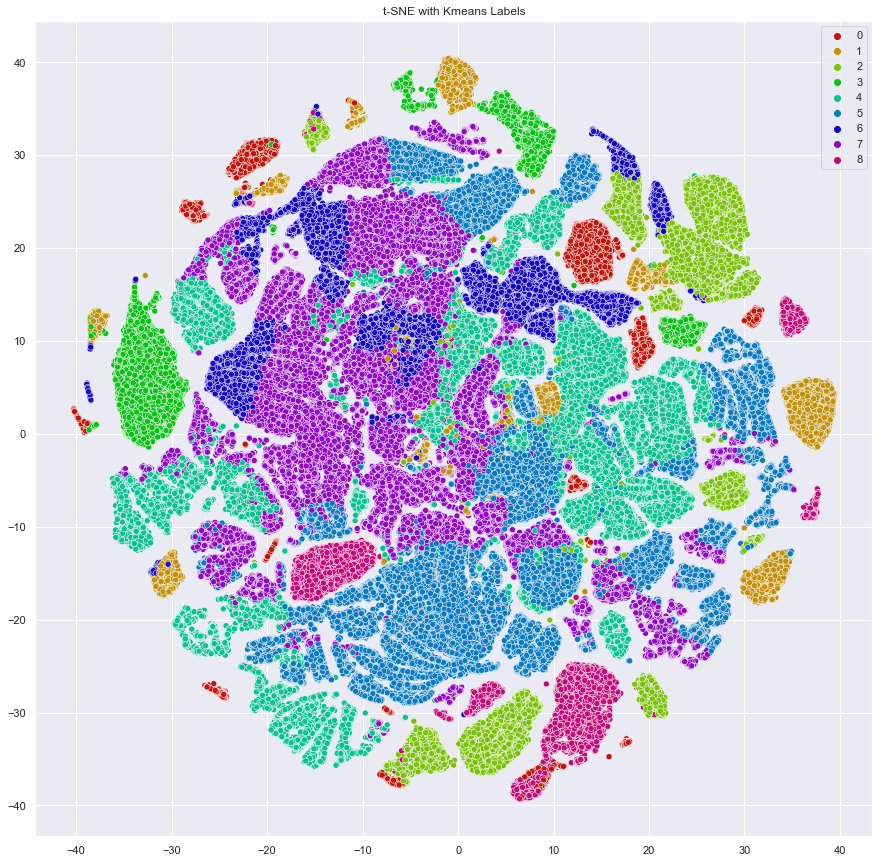

In [29]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.hls_palette(9, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
plt.title('t-SNE with Kmeans Labels')
plt.show()